In [36]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import preprocessing
import time
from sklearn.metrics import accuracy_score
import sys

In [37]:
source_folder = "C:\\Users\\18503\\Dropbox\\Course\\Applied Machine Learning\\Homework\\hw6"

In [38]:
os.listdir(os.path.join(source_folder,"Gisette"))

['Dataset.pdf',
 'GISETTE.htm',
 'gisette.param',
 'gisette_test.data',
 'gisette_train.data',
 'gisette_train.labels',
 'gisette_valid.data',
 'gisette_valid.labels']

### PreProcessing

In [66]:
def Preprocess(dataset,delimiter):

    Train_data  = np.genfromtxt(os.path.join(source_folder,dataset,dataset.lower()+"_train.data"),delimiter =delimiter)
    Train_label = np.genfromtxt(os.path.join(source_folder,dataset,dataset.lower()+"_train.labels"))
    Test_data  = np.genfromtxt(os.path.join(source_folder,dataset,dataset.lower()+"_valid.data"),delimiter=delimiter)
    Test_label = np.genfromtxt(os.path.join(source_folder,dataset,dataset.lower()+"_valid.labels"))
    scaler = preprocessing.StandardScaler().fit(Train_data)
    Train_data = scaler.transform(Train_data)
    Test_data  = scaler.transform(Test_data)
    #print(Train_data.mean(axis=0),Train_data.std(axis=0),Test_data.mean(axis=0),Test_data.std(axis=0))
    
    #Add a column of one
    #N_train,N_test              = Train_data.shape[0],Test_data.shape[0]
    #Train_data,Test_data        = np.hstack((np.ones((N_train,1)),Train_data)),np.hstack((np.ones((N_test,1)),Test_data))
    
    #Change label's from -1 to 0
    Train_label = np.where(Train_label==-1,0,Train_label)
    Test_label  = np.where(Test_label==-1,0,Test_label)
    Train_label,Test_label = Train_label.reshape(-1,1),Test_label.reshape(-1,1)
    return Train_data,Train_label,Test_data,Test_label

### Train and Predict

In [41]:
def predict(W, data, threshold=0.5):
    p = sigmoid(data@W) >= threshold
    p = p.astype('int')
    return(p)

In [42]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [61]:
def error(W,X,Y):
    Predicted_label  = predict(W,X,threshold=0.5)
    return 1-accuracy_score(Y,Predicted_label)

In [124]:
def inverse_scheduler(k,N_iter,i,mu,Total_attributes,beta):
    temp = k + (Total_attributes-k)*np.max((0,(N_iter-2*i)/(2*i*mu + N_iter)))
    temp = int(temp)
    sorted_beta = np.sort(abs(beta),axis=0)[::-1]
    cutff_off = sorted_beta[temp]
    beta = np.where(abs(beta)>=cutff_off,beta,0)
    return beta

In [45]:
def Liklihood_grad(X,Y,beta,s):
    prod = np.exp(np.matmul(X,beta))
    temp = np.matmul(X.T,Y - np.divide(prod,1 + prod)) + 4*s*np.linalg.norm(beta)*beta
    return temp

In [88]:
def likelihood(X,Y,W,s):
    temp   = np.matmul(X,W)
    result = Y*temp - np.log(1+np.exp(temp))
    result = np.sum(result,axis=0) + s*np.linalg.norm(W)
    return result

In [122]:
def FSA(X,Y,mu=30,N_iter=500,s=1e-4,lr=40,k=10,isSaveliklihood=False):
    Number_of_samples,Number_of_attribute = X.shape
    beta = np.zeros(shape=(Number_of_attribute,1))
    beta_0 = beta.copy()
    
    val = [0]*N_iter
    
    for i in range(N_iter):
        beta = beta_0 + (lr/Number_of_samples)*Liklihood_grad(X,Y,beta_0,s)
        beta = inverse_scheduler(k,N_iter,i+1,mu,Number_of_attribute,beta.copy())
        beta_0 = beta.copy()
        if isSaveliklihood:
            val[i] = likelihood(X,Y,beta,s)
        
    return beta,val


In [56]:
def plot_error(train_error,test_error,name):
    K  = np.array([10,30,100,300,500])
    plt.xticks(np.linspace(0,len(K)-1,len(K)),K) 
    plt.plot(train_error,label="Train Error")
    plt.plot(test_error,label="Test Error")
    plt.xlabel("k")
    plt.ylabel("Misclassification_error")
    plt.title("Error For %s Dataset as function of features" %name)
    plt.legend()
    plt.show()

In [64]:
def plot_liklihood(val,name):
    plt.plot(val)
    plt.xlabel("Iterations")
    plt.ylabel("Log-Likelihood")
    plt.title("Log-Likelihood For %s Dataset for k=30 features" %name)
    plt.show()

# Part 1

In [67]:
dataset  = str("Gisette")
Train_data_1,Train_label_1,Test_data_1,Test_label_1 = Preprocess(dataset,delimiter="")
Train_data_1.shape,Train_label_1.shape,Test_data_1.shape,Test_label_1.shape

((6000, 5000), (6000, 1), (1000, 5000), (1000, 1))

In [143]:
Train_error_1 = []
Test_error_1  = []
k_list = [10,30,100,300,500]

for k in k_list:
    print("Running Routine for %d"%k)
    
    if k == 30:
        beta_1,liklihood_val_1 = FSA(Train_data_1,Train_label_1,k,lr=10,isSaveliklihood=True)

    beta_1,_        = FSA(Train_data_1,Train_label_1,k,isSaveliklihood=False)
    Train_error_1.append(error(beta_1,Train_data_1,Train_label_1))
    Test_error_1.append(error(beta_1,Test_data_1,Test_label_1))


Running Routine for 10


C:\Users\18503\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Users\18503\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\18503\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater_equal
  


Running Routine for 30


C:\Users\18503\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Running Routine for 100
Running Routine for 300
Running Routine for 500


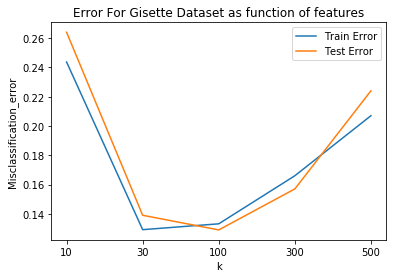

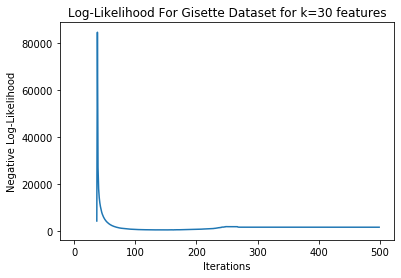

In [148]:
plot_error(Train_error_1,Test_error_1,"Gisette")
plot_liklihood(-1*np.array(liklihood_val_1),"Gisette")

# Part 2

In [90]:
dataset  = str("Dexter")
Train_data_2,Train_label_2,Test_data_2,Test_label_2 = Preprocess(dataset,delimiter=",")
Train_data_2.shape,Train_label_2.shape,Test_data_2.shape,Test_label_2.shape

((300, 20000), (300, 1), (300, 20000), (300, 1))

In [144]:
Train_error_2 = []
Test_error_2  = []
k_list = [10,30,100,300,500]

for k in k_list:
    print("Running Routine for %d"%k)
    
    if k == 30:
        beta_2,liklihood_val_2 = FSA(Train_data_2,Train_label_2,k,lr=5,isSaveliklihood=True)

    beta_2,_        = FSA(Train_data_2,Train_label_2,k,lr=10,isSaveliklihood=False)
    Train_error_2.append(error(beta_2,Train_data_2,Train_label_2))
    Test_error_2.append(error(beta_2,Test_data_2,Test_label_2))



Running Routine for 10
Running Routine for 30
Running Routine for 100
Running Routine for 300
Running Routine for 500


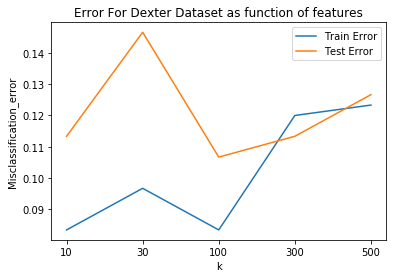

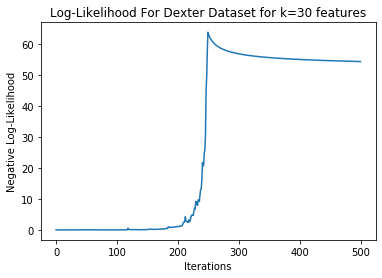

In [149]:
plot_error(Train_error_2,Test_error_2,"Dexter")
plot_liklihood(-1*np.array(liklihood_val_2),"Dexter")

# Part 3

In [127]:
dataset  = str("MADELON")
Train_data_3,Train_label_3,Test_data_3,Test_label_3 = Preprocess(dataset,delimiter="")
Train_data_3.shape,Train_label_3.shape,Test_data_3.shape,Test_label_3.shape

((2000, 500), (2000, 1), (600, 500), (600, 1))

In [145]:
Train_error_3 = []
Test_error_3  = []
k_list = [10,30,100,300,500]

for k in k_list:
    print("Running Routine for %d"%k)
    
    if k == 30:
        beta_3,liklihood_val_3 = FSA(Train_data_3,Train_label_3,k,lr=10,isSaveliklihood=True)

    beta_3,_        = FSA(Train_data_3,Train_label_3,k,isSaveliklihood=False)
    Train_error_3.append(error(beta_3,Train_data_3,Train_label_3))
    Test_error_3.append(error(beta_3,Test_data_3,Test_label_3))



Running Routine for 10
Running Routine for 30
Running Routine for 100
Running Routine for 300
Running Routine for 500


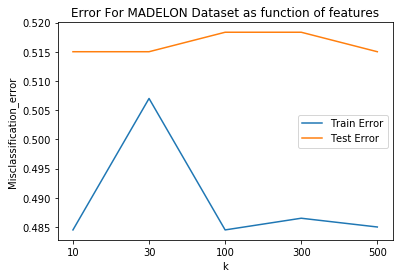

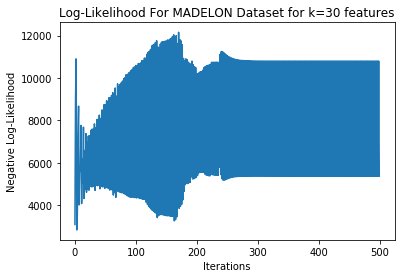

In [150]:
plot_error(Train_error_3,Test_error_3,"MADELON")
plot_liklihood(-1*np.array(liklihood_val_3),"MADELON")